In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from tqdm import tqdm

100%|██████████| 1000000/1000000 [07:26<00:00, 2240.73it/s]


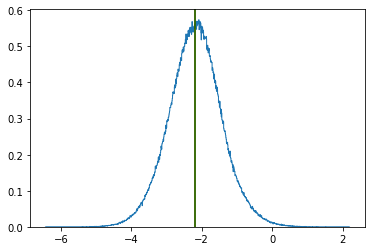

In [10]:
rep_l = 1000000
adftest_l = np.ones(rep_l)

# simulate
T = 10000
for i in tqdm(range(0,rep_l)):
# for i in range(0,rep_l):
    u = np.random.normal(loc=0,scale=1,size=T)
    W = 1/np.sqrt(T)*np.cumsum(u)
    W[0] = 0

    r = np.linspace(0, 1, len(W)) # portion

    detQ = 1/12 * 1/T * np.sum(W**2) + 1/T * np.sum(W*r) * 1/T * np.sum(W) -\
        (1/T * np.sum(W*r))**2 - 1/3 * (1/T * np.sum(W)) ** 2

    denom = W[T-1] * (1/2 * 1/T * np.sum(W*r) - 1/3 * 1/T * np.sum(W)) + \
        1/2 * (W[T-1] ** 2 - 1) * 1/12 + \
        (1/2 * 1/T * np.sum(W) - 1/T * np.sum(W*r)) * (W[T-1] - 1/T * np.sum(W))

    adftest_l[i] = denom / np.sqrt(detQ / 12)
    
# plot 1
n, x, _ = plt.hist(adftest_l, bins=1000,
                   histtype=u'step', density=True)  
plt.axvline(np.mean(adftest_l),c="red")
plt.axvline(np.median(adftest_l),c="green")

In [12]:
pd.DataFrame({
    "statistics":adftest_l
}).to_csv("simulated_dist.csv")

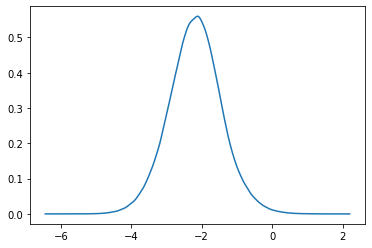

In [11]:
# Plot 2
density = stats.gaussian_kde(adftest_l)
plt.plot(x, density(x))

In [14]:
cr_pt = [1,2.5,5,10,20,50,80,90,95,97.5,99]
print(pd.DataFrame({
    "Critical Point":cr_pt,
    "Test Stat":np.percentile(a=adftest_l,q=cr_pt)
}).to_markdown(index=None))

|   Critical Point |   Test Stat |
|-----------------:|------------:|
|              1   |   -3.97002  |
|              2.5 |   -3.66935  |
|              5   |   -3.41646  |
|             10   |   -3.12785  |
|             20   |   -2.79376  |
|             50   |   -2.18089  |
|             80   |   -1.58191  |
|             90   |   -1.24762  |
|             95   |   -0.940853 |
|             97.5 |   -0.663412 |
|             99   |   -0.330879 |
